# Data Analysis
The goal of this Notebook is to explore and analyse the data that is going to be used in this project.

## Origin of the Data

The data used for this project is spatially resolved and single nucleus transcriptomics data from the dorsolateral prefrontal cortex (DLPFC) from postmortem human brain samples obtained from the [spatialDLPFC](https://github.com/LieberInstitute/spatialDLPFC) project from the [Lieber Institute for Brain Development](https://www.libd.org/)

The data has been processed and can be obtained in a format that is easy to digest in Python, as it's presented in an [AnnData Object](https://anndata.readthedocs.io/en/stable/) when downloading it from [FigShare](https://figshare.com/articles/dataset/Visium_DLPFC_preprocessed/22004273).

The latter is the method used throughout this project.

## Downloading the data

In [1]:
%%sh
./dataset/getdata.sh

~/projects/GNNCellClassification/dataset ~/projects/GNNCellClassification
Don't download data: Both data and images exists
~/projects/GNNCellClassification


## Obtaining the spatial and histological data

Let's first add src to our path:

In [2]:
import sys, os
sys.path.append(os.path.abspath("src"))

In [3]:
%load_ext autoreload
%autoreload 2

import importlib
import preprocess

data_dir, img_dir, graph_dir = "dataset/data", "dataset/images", "out/graphs"
ann_data, histology_imgs = preprocess.main(data_dir, img_dir, graph_dir)

Loading AnnData for sample 151676 …
Loading AnnData for sample 151669 …
Loading AnnData for sample 151507 …
Loading AnnData for sample 151508 …
Loading AnnData for sample 151672 …
Loading AnnData for sample 151670 …
Loading AnnData for sample 151673 …
Loading AnnData for sample 151675 …
Loading AnnData for sample 151510 …
Loading AnnData for sample 151671 …
Loading AnnData for sample 151674 …
Loading AnnData for sample 151509 …
Loading Image for sample 151676 …
Loading Image for sample 151669 …
Loading Image for sample 151507 …
Loading Image for sample 151508 …
Loading Image for sample 151672 …
Loading Image for sample 151670 …
Loading Image for sample 151673 …
Loading Image for sample 151675 …
Loading Image for sample 151510 …
Loading Image for sample 151671 …
Loading Image for sample 151674 …
Loading Image for sample 151509 …


In [4]:
    print("obs: ", ann_data['151676'].obs)
    print("var: ", ann_data['151676'].var)
    print("uns: ", ann_data['151676'].uns)
    print("obsm: ", ann_data['151676'].obsm['spatial'])
    print("obsp: ", ann_data['151676'].obsp)
    print("X: ", ann_data['151676'].X)

obs:                      in_tissue  array_row  array_col  sce.sample_name  \
AAACAAGTATCTCCCA-1          1         50        102           151676   
AAACAATCTACTAGCA-1          1          3         43           151676   
AAACACCAATAACTGC-1          1         59         19           151676   
AAACAGAGCGACTCCT-1          1         14         94           151676   
AAACAGGGTCTATATT-1          1         47         13           151676   
...                       ...        ...        ...              ...   
TTGTTGTGTGTCAAGA-1          1         31         77           151676   
TTGTTTCACATCCAGG-1          1         58         42           151676   
TTGTTTCATTAGTCTA-1          1         60         30           151676   
TTGTTTCCATACAACT-1          1         45         27           151676   
TTGTTTGTGTAAATTC-1          1          7         51           151676   

                   sce.layer_guess  
AAACAAGTATCTCCCA-1          Layer3  
AAACAATCTACTAGCA-1          Layer1  
AAACACCAATAACTGC-1

Each patient has a corresponding AnnData Object:

In [5]:
print(ann_data.keys())

dict_keys(['151676', '151669', '151507', '151508', '151672', '151670', '151673', '151675', '151510', '151671', '151674', '151509'])


## Exploring the AnnData object

Let's explore what a patient's spatial information is composed of:

In [6]:
print(ann_data['151676'])

AnnData object with n_obs × n_vars = 3460 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'sce.sample_name', 'sce.layer_guess'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatial_neighbors', 'transforms'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


AnnData is specifically designed for matrix-like data.

Observations: Each of which can be represented as d-dimensional vectors, where each dimension corresponds to a variable or feature.
Both the rows and columns of this nxd matrix are special in the sense that they are indexed.

For instance, in scRNA-seq data, each row corresponds to a cell with a barcode, and each column corresponds to a gene with a gene id.

### Observations' description

Each spot is identified with a barcode.
Each spot corresponds to one captured location on the Visiyum slide for a single brain section.
There are `3460` spots / barcodes.

`array_row` and `array_col` are the (x,y) coordinates for each spot barcode.

Let's display the observations. Each barcode is the index for our DataFrame:

In [7]:
ann_data['151676'].obs

,in_tissue,array_row,array_col,sce.sample_name,sce.layer_guess
AAACAAGTATCTCCCA-1,1,50,102,151676,Layer3
AAACAATCTACTAGCA-1,1,3,43,151676,Layer1
AAACACCAATAACTGC-1,1,59,19,151676,WM
AAACAGAGCGACTCCT-1,1,14,94,151676,Layer3
AAACAGGGTCTATATT-1,1,47,13,151676,Layer6
...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,151676,Layer6
TTGTTTCACATCCAGG-1,1,58,42,151676,WM
TTGTTTCATTAGTCTA-1,1,60,30,151676,WM
TTGTTTCCATACAACT-1,1,45,27,151676,Layer6


In [8]:
ann_data['151676'].obs.shape

(3460, 5)

`in_tissue` specifies where the spot was taken from tissue (1) or not (0). 
Let's see which samples don't come from tissue for this patient:

In [9]:
ann_data['151676'].obs['in_tissue'].loc[ann_data['151676'].obs['in_tissue'] == 0]

Series([], Name: in_tissue, dtype: int64)

Let's now check this for each patient:

In [10]:
no_tissue = False
for patient_id in ann_data.keys():
    len_i = len(ann_data[patient_id].obs['in_tissue'].loc[ann_data[patient_id].obs['in_tissue'] == 0])
    no_tissue = len_i != 0
    if no_tissue:
        print(f"patient {patient_id} has samples that don't come from tissue")

if not no_tissue:
    print("No patient has samples that don't come from tissue. `in_tissue` information is redundant")

No patient has samples that don't come from tissue. `in_tissue` information is redundant


As different barcodes share the same row, the rows should not be unique, let's check that:

In [11]:
ann_data['151676'].obs['array_row'].is_unique

False

`sample_name` should have the name of the patient only:

In [12]:
ann_data['151676'].obs['sce.sample_name']

AAACAAGTATCTCCCA-1    151676
AAACAATCTACTAGCA-1    151676
AAACACCAATAACTGC-1    151676
AAACAGAGCGACTCCT-1    151676
AAACAGGGTCTATATT-1    151676
                       ...  
TTGTTGTGTGTCAAGA-1    151676
TTGTTTCACATCCAGG-1    151676
TTGTTTCATTAGTCTA-1    151676
TTGTTTCCATACAACT-1    151676
TTGTTTGTGTAAATTC-1    151676
Name: sce.sample_name, Length: 3460, dtype: int64

### Layers

Each spot is classified with the layer it's said to belong to:

Six histological layers + white matter. Specifically:

- **Layer 1** – the molecular layer (few cell bodies, mostly neuropil)
- **Layer 2** – external granular layer (small densely packed neurons)
- **Layer 3** – external pyramidal layer (medium-sized pyramidal neurons)
- **Layer 4** – internal granular layer (stellate and granular cells)
- **Layer 5** – internal pyramidal layer (large pyramidal neurons projecting to subcortical targets)
- **Layer 6** – multiform (fusiform) layer (varied cell types sending feedback to the thalamus)
- **WM** – White Matter, the fiber-tract region beneath the cortical layers, composed mainly of myelinated axons rather than neuronal cell bodies.

In [13]:
ann_data['151676'].obs['sce.layer_guess']

AAACAAGTATCTCCCA-1    Layer3
AAACAATCTACTAGCA-1    Layer1
AAACACCAATAACTGC-1        WM
AAACAGAGCGACTCCT-1    Layer3
AAACAGGGTCTATATT-1    Layer6
                       ...  
TTGTTGTGTGTCAAGA-1    Layer6
TTGTTTCACATCCAGG-1        WM
TTGTTTCATTAGTCTA-1        WM
TTGTTTCCATACAACT-1    Layer6
TTGTTTGTGTAAATTC-1    Layer1
Name: sce.layer_guess, Length: 3460, dtype: category
Categories (7, object): ['Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'WM']

## Var description

In [14]:
ann_data['151676'].var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38
AC233755.1,ENSG00000275063,Gene Expression,GRCh38
AC240274.1,ENSG00000271254,Gene Expression,GRCh38
AC213203.1,ENSG00000277475,Gene Expression,GRCh38


`feature_types` is redundant, they are all Gene Expressions:

In [15]:
import numpy as np

np.unique(ann_data['151676'].var['feature_types'])

array(['Gene Expression'], dtype=object)

`genome` is redundant, they are all `GRCh38`:

In [16]:
np.unique(ann_data['151676'].var['genome'])

array(['GRCh38'], dtype=object)

In [17]:
np.unique(ann_data['151676'].var['gene_ids'])

array(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419', ...,
       'ENSG00000285508', 'ENSG00000285509', 'ENSG00000285513'],
      shape=(33538,), dtype=object)

### Obsp description

`obsp` data contains two matrices:
- Spatial Connectivities matrix
- Spatial Distances matrix

The first is to indicate whether cells are connected to each other, the other to indicate what the weighted distances in those connections are.

In [18]:
print(ann_data['151676'].obsp)

PairwiseArrays with keys: spatial_connectivities, spatial_distances


In [19]:
print(ann_data['151676'].obsp['spatial_connectivities'])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20052 stored elements and shape (3460, 3460)>
  Coords	Values
  (0, 368)	1.0
  (0, 451)	1.0
  (0, 991)	1.0
  (0, 2001)	1.0
  (0, 2207)	1.0
  (0, 3367)	1.0
  (1, 645)	1.0
  (1, 1404)	1.0
  (1, 1521)	1.0
  (1, 2069)	1.0
  (1, 2212)	1.0
  (1, 2726)	1.0
  (2, 545)	1.0
  (2, 1613)	1.0
  (2, 1740)	1.0
  (2, 2159)	1.0
  (2, 2877)	1.0
  (2, 3151)	1.0
  (3, 997)	1.0
  (3, 1968)	1.0
  (3, 2120)	1.0
  (3, 2822)	1.0
  (3, 2825)	1.0
  (3, 3416)	1.0
  (4, 258)	1.0
  :	:
  (3455, 3436)	1.0
  (3456, 374)	1.0
  (3456, 1415)	1.0
  (3456, 1535)	1.0
  (3456, 2428)	1.0
  (3456, 2500)	1.0
  (3456, 2797)	1.0
  (3457, 62)	1.0
  (3457, 289)	1.0
  (3457, 788)	1.0
  (3457, 1770)	1.0
  (3457, 2743)	1.0
  (3457, 3117)	1.0
  (3458, 542)	1.0
  (3458, 1709)	1.0
  (3458, 1858)	1.0
  (3458, 2488)	1.0
  (3458, 2685)	1.0
  (3458, 3238)	1.0
  (3459, 114)	1.0
  (3459, 1476)	1.0
  (3459, 2044)	1.0
  (3459, 2187)	1.0
  (3459, 2377)	1.0
  (3459, 3232)	1.0


In [20]:
spatial_connectivities = ann_data['151676'].obsp['spatial_connectivities']
print(spatial_connectivities)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20052 stored elements and shape (3460, 3460)>
  Coords	Values
  (0, 368)	1.0
  (0, 451)	1.0
  (0, 991)	1.0
  (0, 2001)	1.0
  (0, 2207)	1.0
  (0, 3367)	1.0
  (1, 645)	1.0
  (1, 1404)	1.0
  (1, 1521)	1.0
  (1, 2069)	1.0
  (1, 2212)	1.0
  (1, 2726)	1.0
  (2, 545)	1.0
  (2, 1613)	1.0
  (2, 1740)	1.0
  (2, 2159)	1.0
  (2, 2877)	1.0
  (2, 3151)	1.0
  (3, 997)	1.0
  (3, 1968)	1.0
  (3, 2120)	1.0
  (3, 2822)	1.0
  (3, 2825)	1.0
  (3, 3416)	1.0
  (4, 258)	1.0
  :	:
  (3455, 3436)	1.0
  (3456, 374)	1.0
  (3456, 1415)	1.0
  (3456, 1535)	1.0
  (3456, 2428)	1.0
  (3456, 2500)	1.0
  (3456, 2797)	1.0
  (3457, 62)	1.0
  (3457, 289)	1.0
  (3457, 788)	1.0
  (3457, 1770)	1.0
  (3457, 2743)	1.0
  (3457, 3117)	1.0
  (3458, 542)	1.0
  (3458, 1709)	1.0
  (3458, 1858)	1.0
  (3458, 2488)	1.0
  (3458, 2685)	1.0
  (3458, 3238)	1.0
  (3459, 114)	1.0
  (3459, 1476)	1.0
  (3459, 2044)	1.0
  (3459, 2187)	1.0
  (3459, 2377)	1.0
  (3459, 3232)	1.0


Possible values:  [0. 1.]


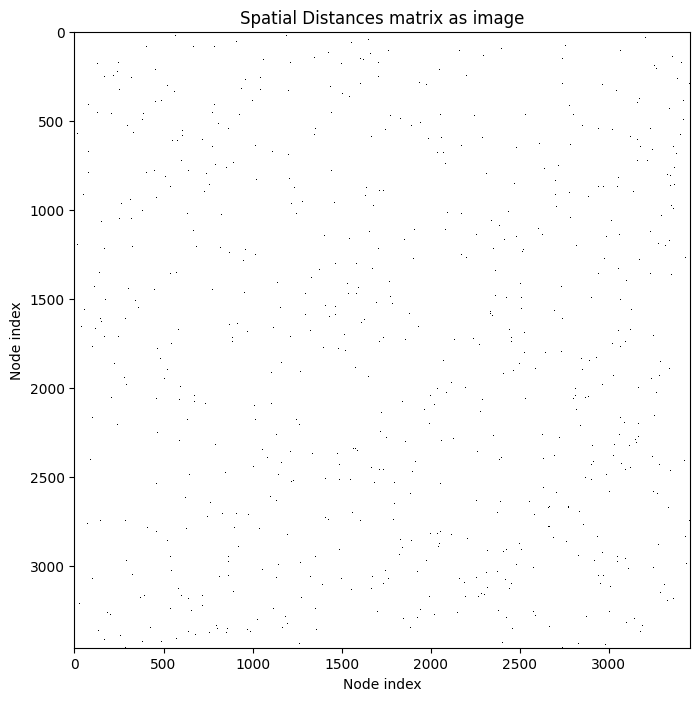

In [21]:
from matplotlib import pyplot as plt
spatial_distances = ann_data['151676'].obsp['spatial_distances']
print("Possible values: ", np.unique(spatial_distances.toarray()))

plt.figure(figsize=(8,8))
plt.imshow(spatial_distances.todense(), cmap="Greys", interpolation="none", aspect="equal")
plt.title("Spatial Distances matrix as image")
plt.xlabel("Node index")
plt.ylabel("Node index")
plt.show()

In [22]:
import scipy.sparse as sp

assert spatial_connectivities.shape == spatial_distances.shape, "Shapes differ!"

identical = ((spatial_connectivities != spatial_distances).nnz == 0)

print("Are `connectivities` and `distances` identical?", identical)

Are `connectivities` and `distances` identical? True


### Unstructured data

In [23]:
ann_data['151676'].uns.keys()

dict_keys(['spatial', 'spatial_neighbors', 'transforms'])

In [24]:
print("uns spatial neighbors: ", ann_data['151676'].uns['spatial_neighbors'].keys())
print("uns spatial neighbors connectivities_key:", ann_data['151676'].uns['spatial_neighbors']['connectivities_key'])
print("uns spatial_neighbors distances_key:", ann_data['151676'].uns['spatial_neighbors']['distances_key'])
print("uns spatial_neighbors params: ", ann_data['151676'].uns['spatial_neighbors']['params'])

uns spatial neighbors:  dict_keys(['connectivities_key', 'distances_key', 'params'])
uns spatial neighbors connectivities_key: spatial_connectivities
uns spatial_neighbors distances_key: spatial_distances
uns spatial_neighbors params:  {'coord_type': 'grid', 'n_neighbors': np.int64(6)}


In [25]:
print("uns: ", ann_data['151676'].uns['spatial'].keys())
print("uns: ", ann_data['151676'].uns['spatial']['151676'].keys())

uns:  dict_keys(['151676'])
uns:  dict_keys(['images', 'metadata', 'scalefactors'])


In [26]:
print("uns image scalefactors:", ann_data['151676'].uns['spatial']['151676']['images'].keys())

uns image scalefactors: dict_keys(['hires', 'lowres'])


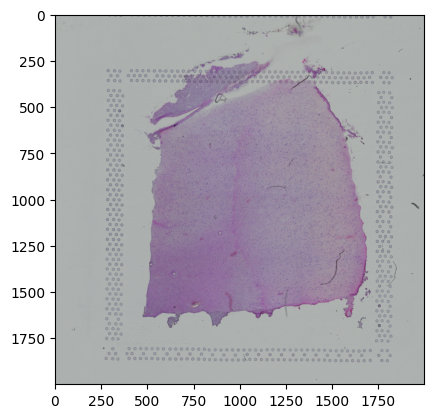

In [27]:
plt.imshow(ann_data['151676'].uns['spatial']['151676']['images']['hires'])
plt.show()

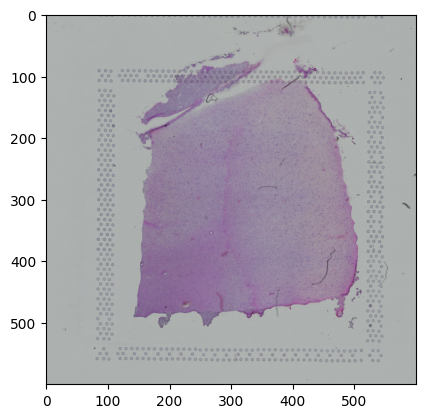

In [28]:
plt.imshow(ann_data['151676'].uns['spatial']['151676']['images']['lowres'])
plt.show()

#### Scale Factors

For each image (low or high resolution) we have a `scalefactor` that lets us map spatial coordinates to pixels (see below in the description of `obsm`), so that we can identify each spot in the histological image.
Let's take a look at those scalefactors:

In [29]:
ann_data['151676'].uns['spatial']['151676']['scalefactors']

{'fiducial_diameter_fullres': np.float64(144.575350960513),
 'spot_diameter_fullres': np.float64(96.38356730700866),
 'tissue_hires_scalef': np.float64(0.150015),
 'tissue_lowres_scalef': np.float64(0.045004502)}

- **fiducial_diameter_fullres**: Diameter of the fiducial alignment circles printed around the capture area.
- **spot_diameter_fullres**: Diameter of each Visium spot in the full resolution H&E image in pixels.
- **tissue_hires_scalef**: Ratio of the size of the high resolution H&E image to the full resolution image.
- **tissue_lowres_scalef**: Ratio of the size of the low resolution H&E image to the full resolution image.

#### Metadata

In [30]:
print("uns spatial metadata:", ann_data['151676'].uns['spatial']['151676']['metadata'].keys())
print("chemistry_description: ", ann_data['151676'].uns['spatial']['151676']['metadata']['chemistry_description'])
print("software_version: ", ann_data['151676'].uns['spatial']['151676']['metadata']['software_version'])

uns spatial metadata: dict_keys(['chemistry_description', 'software_version'])
chemistry_description:  custom
software_version:  4509.5.5


In [31]:
print("uns: ", ann_data['151676'].uns['spatial_neighbors'])

uns:  {'connectivities_key': 'spatial_connectivities', 'distances_key': 'spatial_distances', 'params': {'coord_type': 'grid', 'n_neighbors': np.int64(6)}}


In [32]:
print("uns: ", ann_data['151676'].uns['transforms'])

uns:  ["KNN(['n_neighbors=6'])"]


### Obsm description

From the [AnnData Documentation](https://anndata.readthedocs.io/en/stable/generated/anndata.AnnData.html):

Multi-dimensional annotations are stored in `obsm` and `varm`, which are aligned to the objects observation and variable dimensions respectively.
So index `i` is the same spot across `obsm` and `obs`.

`obsm['spatial'][i]` has the pixel coordinates for spot `i` in obs.

In [33]:
print(ann_data['151676'].obsm)

AxisArrays with keys: spatial


In [34]:
print(ann_data['151676'].obsm['spatial'])

[[9650 2594]
 [5630 8254]
 [3928 1558]
 ...
 [4684 1433]
 [4491 3231]
 [6177 7771]]


This means that we can map each spot / barcode to a particular point in the image:

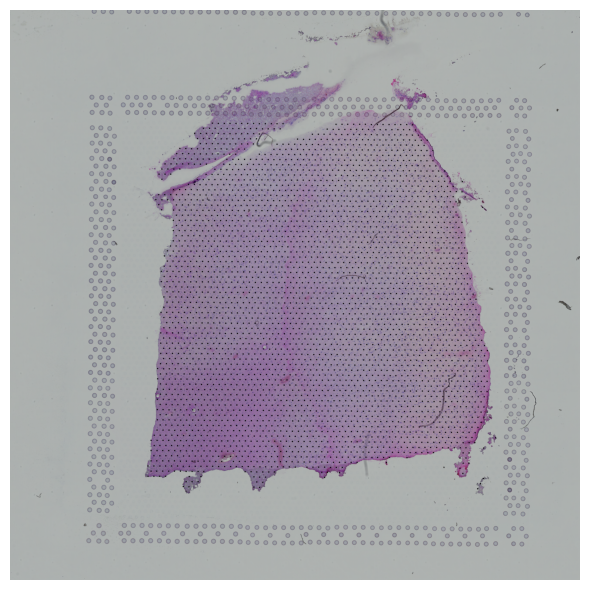

In [49]:
offsets = {'151676': 310, '151669': 276, '151507': 236, '151508': 232, '151672': 264, \
           '151670': 339, '151673': 260, '151675': 228, '151510': 204, '151671': 238, \
           '151674': 234, '151509': 220}

assert len(ann_data.keys()) == len(offsets)
patient = '151676'
hires_scale = ann_data[patient].uns['spatial'][patient]['scalefactors']['tissue_hires_scalef']
hires_spot_pixels = ann_data[patient].obsm['spatial'] * hires_scale
hires_spot_pixels = hires_spot_pixels.astype(int)
hires_image = ann_data[patient].uns['spatial'][patient]['images']['hires']
hires_shape = hires_image.shape
assert min(hires_shape[0], hires_shape[1]) > hires_spot_pixels.max()



thickness = 2
new_hires = np.flip(new_hires, 0)
for xi, yi in zip(hires_spot_pixels[:, 0], hires_spot_pixels[:, 1]):
    x0 = max(0, xi - thickness)
    x1 = min(hires_image.shape[1], xi + thickness)
    y0 = max(0, yi - thickness) + offsets[patient]
    y1 = min(hires_image.shape[0], yi + thickness) + offsets[patient]
    new_hires[y0:y1, x0:x1, :] = [0, 0, 0]

new_hires = np.flip(new_hires, 0)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(new_hires, origin='upper')

ax.axis('off')
plt.tight_layout()
plt.show()

### X description

Each entry in the X matrix is a `UMI` count (i.e. how many mRNA molecules of that gene were captured in that spot).

- UMI: Unique molecular identifiers - associated with a particular gene or transcript in a sequencing experiment

In [36]:
print("X: ", ann_data['151676'].X.shape)

X:  (3460, 33538)


In [37]:
ann_data['151676'].obs_names[32]

'AAAGTGTGATTTATCT-1'

X is represented as a Sparse Matrix to save memory, as for each cell, very few genes are expressed.

In [38]:
ann_data['151676'].X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 6700560 stored elements and shape (3460, 33538)>

In [39]:
type(ann_data['151676'].X)

scipy.sparse._csr.csr_matrix

In [40]:
nonzeros = ann_data['151676'].X.data
unique_counts = np.unique(nonzeros)
print("All distinct non-zero UMI counts:", unique_counts)

All distinct non-zero UMI counts: [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 19